# Test Subset
___

## Setup

### Importing Packages

In [2]:
import os
import shutil
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture
from astronomaly.dimensionality_reduction import pca
import seaborn as sns
import matplotlib.pyplot as plt

### Directories

In [3]:
# Data Root Directory
data_root_dir = os.path.join(os.getcwd(), 'Data')

# Label Directory
label_dir = os.path.join(data_root_dir, 'DeCaLs/gz_decals_volunteers_1_and_2.parquet')

# Image Directory
img_dir = os.path.join(data_root_dir, 'DeCaLs')

# Feature Directory
feature_dir = os.path.join(data_root_dir, 'features_with_cluster.parquet')

# Output Directory
output_root_dir = os.path.join(data_root_dir, 'Output')

# Classification Directories
spiral_dir = os.path.join(output_root_dir, 'spirals')
round_ell_dir = os.path.join(output_root_dir, 'round_ellipticals')
edge_on_dir = os.path.join(output_root_dir, 'edge_on')

### Features

In [4]:
features = pd.read_parquet(feature_dir)
print('Features with Cluster No.: ', features.shape)

Features with Cluster No.:  (230575, 513)


### Volunteer Labels

In [5]:
volunteer_labels = pd.read_parquet(label_dir)
volunteer_labels = volunteer_labels.set_index('iauname')
print('Volunteer Labels: ', volunteer_labels.shape)

Volunteer Labels:  (92960, 114)


In [6]:
common_labels = volunteer_labels.index.intersection(features.index)
filtered_volunteer_labels = volunteer_labels.loc[common_labels]
filtered_volunteer_labels.index.name= 'iauname'
filtered_volunteer_labels['Cluster'] = features.loc[common_labels, 'Cluster']
print('Filtered Volunteer Labels with Cluster No.: ', filtered_volunteer_labels.shape)

Filtered Volunteer Labels with Cluster No.:  (65290, 115)


## Filtering

In [7]:
count = 0
filenames_to_find = set(filtered_volunteer_labels.index.astype(str) + '.png')

for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file in filenames_to_find:
            count +=1
print('No. of labelled images: ', count)

No. of labelled images:  65290


In [8]:
columns = [col for col in filtered_volunteer_labels.columns if 'edge' in col]
for col in columns:
    print(col)

disk-edge-on_total-votes
disk-edge-on_yes
disk-edge-on_yes_fraction
disk-edge-on_yes_debiased
disk-edge-on_no
disk-edge-on_no_fraction
disk-edge-on_no_debiased
edge-on-bulge_total-votes
edge-on-bulge_rounded
edge-on-bulge_rounded_fraction
edge-on-bulge_rounded_debiased
edge-on-bulge_boxy
edge-on-bulge_boxy_fraction
edge-on-bulge_boxy_debiased
edge-on-bulge_none
edge-on-bulge_none_fraction
edge-on-bulge_none_debiased


### Edge-on Galaxies

In [9]:
edge_on_gal = filtered_volunteer_labels[(filtered_volunteer_labels['disk-edge-on_total-votes'] >= 5) &
                                        (filtered_volunteer_labels['disk-edge-on_yes_fraction'] > 0.8) &
                                        (filtered_volunteer_labels['merging_total-votes'] >= 10) &
                                        (filtered_volunteer_labels['merging_merger_fraction'] < 0.2)].copy()
edge_on_gal['Type'] = 'E'

In [10]:
filenames_to_find = set(edge_on_gal.index.astype(str) + '.png')
count = 0

for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file in filenames_to_find:
            src_path = os.path.join(root, file)
            dest_path = os.path.join(edge_on_dir, file)
            #shutil.copy2(src_path, dest_path)
            count += 1

print(count)

5421


### Round Elliptical Galaxies

In [11]:
round_ell_gal = filtered_volunteer_labels[(filtered_volunteer_labels['smooth-or-featured_smooth_fraction'] > 0.8) &
                                          (filtered_volunteer_labels['how-rounded_total-votes'] >= 5) &
                                          (filtered_volunteer_labels['how-rounded_completely_fraction'] > 0.8) &
                                          (filtered_volunteer_labels['merging_total-votes'] >= 10) &
                                          (filtered_volunteer_labels['merging_merger_fraction'] < 0.2)].copy()
round_ell_gal['Type'] = 'R'

In [12]:
filenames_to_find = set(round_ell_gal.index.astype(str) + '.png')
count = 0

for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file in filenames_to_find:
            src_path = os.path.join(root, file)
            dest_path = os.path.join(round_ell_dir, file)
            #shutil.copy2(src_path, dest_path)
            count += 1

print(count)

4231


### Spiral Galaxies

In [13]:
spiral_gal = filtered_volunteer_labels[(filtered_volunteer_labels['smooth-or-featured_featured-or-disk_fraction'] > 0.8) &
                                       (filtered_volunteer_labels['has-spiral-arms_total-votes'] >= 5) &
                                       (filtered_volunteer_labels['has-spiral-arms_yes_fraction'] > 0.8) &
                                       (filtered_volunteer_labels['merging_total-votes'] >= 10) &
                                       (filtered_volunteer_labels['merging_merger_fraction'] < 0.2)].copy()
spiral_gal['Type'] = 'S'

In [14]:
filenames_to_find = set(spiral_gal.index.astype(str) + '.png')
count = 0

for root, dirs, files in os.walk(img_dir):
    for file in files:
        if file in filenames_to_find:
            src_path = os.path.join(root, file)
            dest_path = os.path.join(spiral_dir, file)
            #shutil.copy2(src_path, dest_path)
            count += 1

print(count)

4034


In [15]:
# save cluster index to label dataframe
test_subset = pd.concat([spiral_gal, round_ell_gal, edge_on_gal])
print('Test Subset: ', test_subset.shape)

Test Subset:  (13686, 116)


## Plotting

<Axes: xlabel='Cluster', ylabel='smooth-or-featured_featured-or-disk_fraction'>

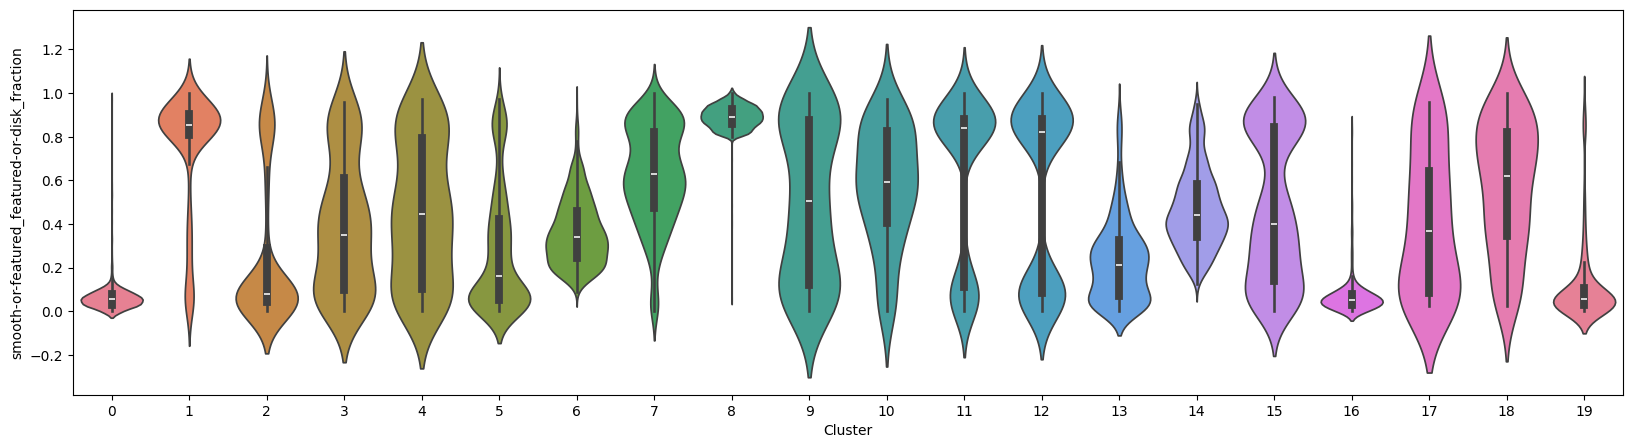

In [21]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Cluster', y='smooth-or-featured_featured-or-disk_fraction', data=test_subset, density_norm='width', palette='husl', hue='Cluster', legend = False)

<Axes: xlabel='Cluster', ylabel='how-rounded_cigar-shaped_fraction'>

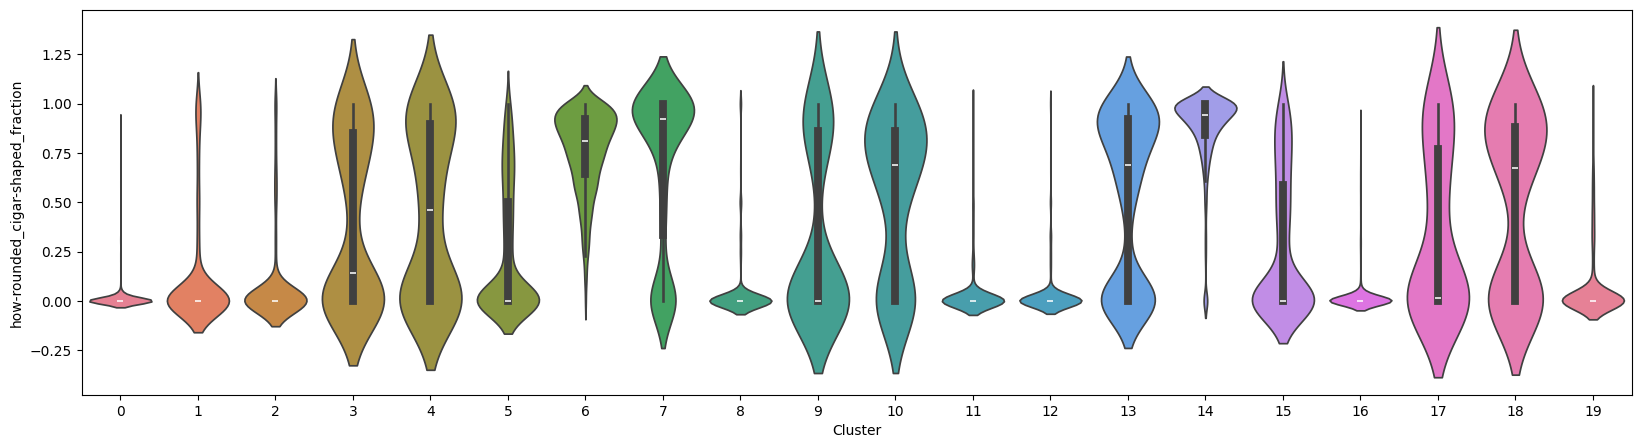

In [22]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Cluster', y='how-rounded_cigar-shaped_fraction', data=test_subset, density_norm='width', palette='husl', hue='Cluster', legend = False)

<Axes: xlabel='Cluster', ylabel='disk-edge-on_yes_fraction'>

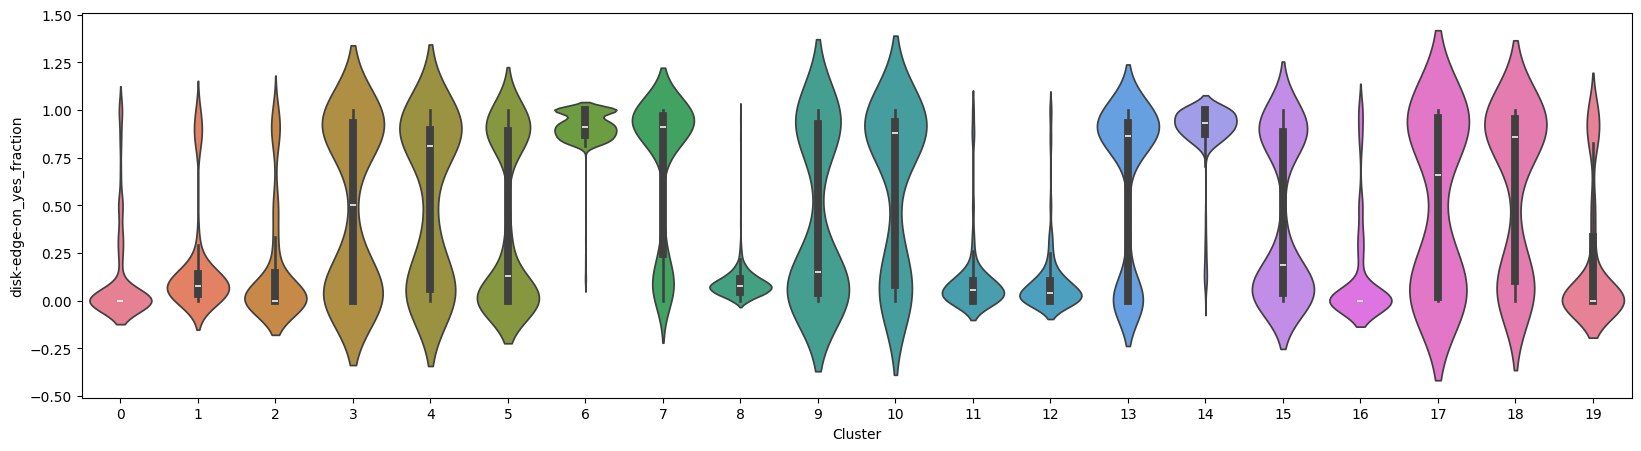

In [24]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Cluster', y='disk-edge-on_yes_fraction', data=test_subset, density_norm='width', palette='husl', hue='Cluster', legend = False)

<Axes: xlabel='Cluster', ylabel='bulge-size_dominant_fraction'>

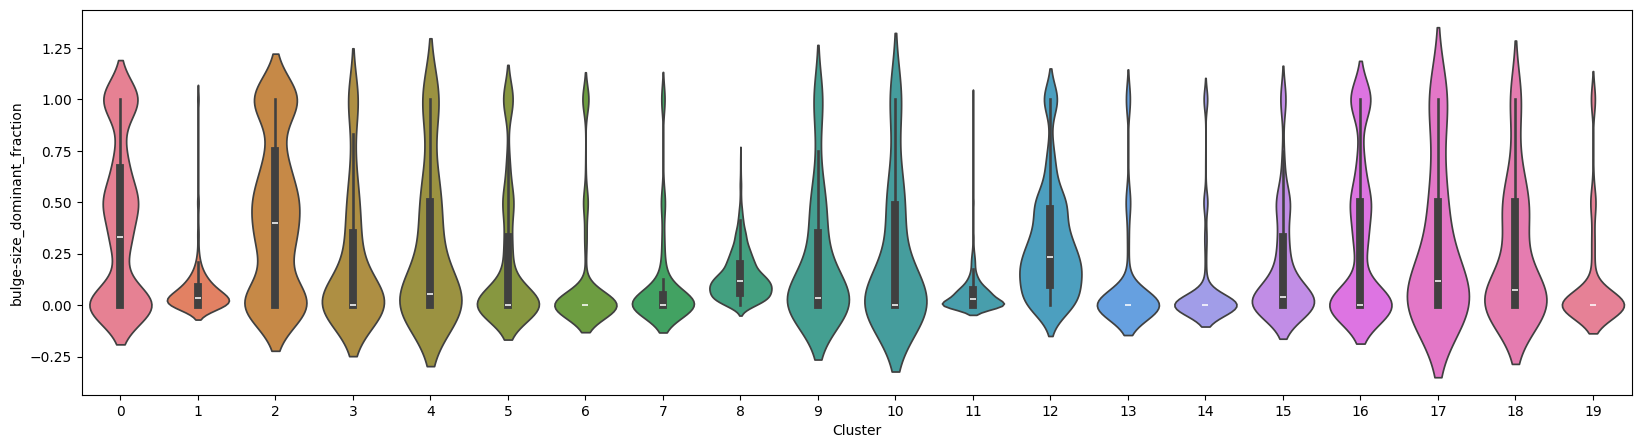

In [23]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Cluster', y='bulge-size_dominant_fraction', data=test_subset, density_norm='width', palette='husl', hue='Cluster', legend = False)

<Axes: xlabel='Cluster', ylabel='merging_neither_fraction'>

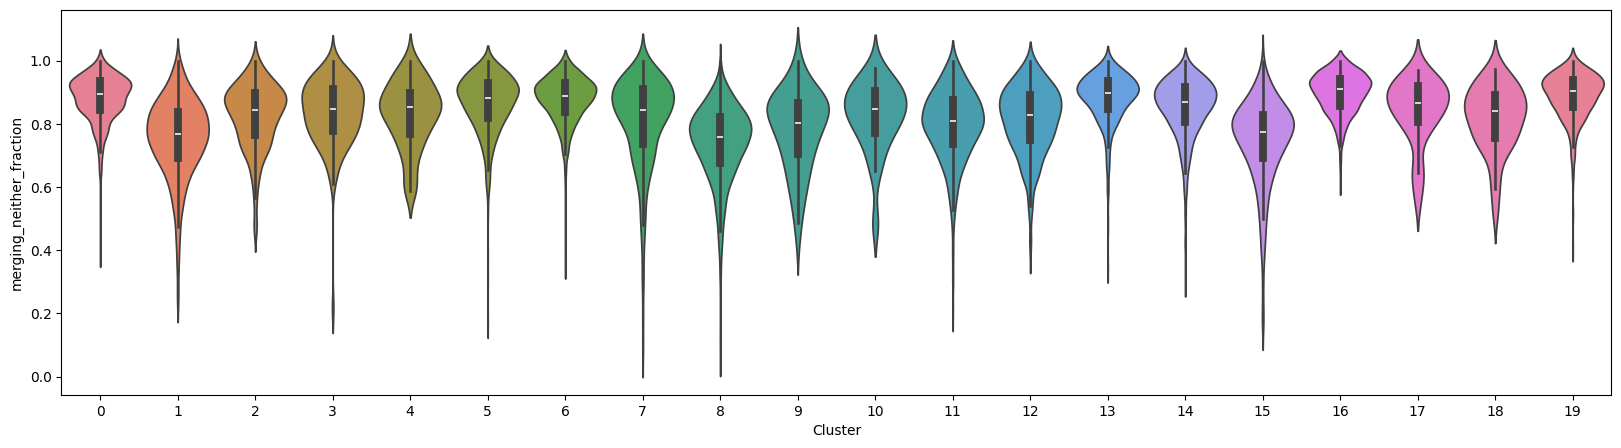

In [25]:
plt.figure(figsize=(20,5))
sns.violinplot(x='Cluster', y='merging_neither_fraction', data=test_subset, density_norm='width', palette='husl', hue='Cluster', legend = False)

## Cluster Assignment

In [20]:
counts = test_subset.groupby(['Cluster', 'Type']).size()
counts_df = counts.reset_index(name='Count')
counts_df['Total'] = counts_df.groupby('Cluster')['Count'].transform('sum')
counts_df['Percentage'] = counts_df['Count'] / counts_df['Total'] * 100
dominant = counts_df.loc[counts_df.groupby('Cluster')['Count'].idxmax()]

cluster_df = dominant.set_index('Cluster')[['Type', 'Percentage']]
cluster_df.columns = ['Dominant_Type', 'Percentage']
cluster_df['Percentage'] = cluster_df['Percentage'].round(2)

print(cluster_df)

        Dominant_Type  Percentage
Cluster                          
0                   R       97.55
1                   S       78.84
2                   R       73.26
3                   E       49.58
4                   E       51.76
5                   R       48.22
6                   E       99.17
7                   E       71.40
8                   S       99.53
9                   E       38.89
10                  E       63.64
11                  S       67.61
12                  S       56.79
13                  E       64.89
14                  E       94.14
15                  E       41.18
16                  R       94.27
17                  E       45.45
18                  E       59.38
19                  R       80.39
